2024 Stack Overflow Developer Survey - US Salary vs Education Analysis 

In [1]:
# import packages for project
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style 
%matplotlib inline
import seaborn as sns
import numpy as np
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
#open csv
ovsv = pd.read_csv('us_dev_df.csv')

In [3]:
#review data
ovsv.head()

,Unnamed: 0,MainBranch,Age,Employment,EdLevel,YearsCode,YearsCodePro,Salary,Languages,Databases,num_of_lang,num_of_db
0,0,I am a developer by profession,45-54 years old,"Employed, full-time",Some college/university study without earning ...,38,30,195000.0,Bash/Shell (all shells);C#;HTML/CSS;JavaScript...,Microsoft SQL Server;PostgreSQL;Snowflake,7,3
1,1,I am a developer by profession,25-34 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,11,230000.0,Bash/Shell (all shells);Go;Python;Rust,BigQuery;Elasticsearch;MariaDB;MongoDB;Redis;S...,4,6
2,2,I am a developer by profession,35-44 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",25,23,85000.0,Bash/Shell (all shells);C#;C++;Go;HTML/CSS;Jav...,Microsoft SQL Server,8,1
3,3,I am a developer by profession,35-44 years old,"Employed, full-time","Secondary school (e.g. American high school, G...",20,18,160000.0,C#;Go;HTML/CSS;JavaScript;SQL;TypeScript,MariaDB;Microsoft SQL Server;PostgreSQL,6,3
4,4,I am a developer by profession,45-54 years old,"Employed, full-time","Associate degree (A.A., A.S., etc.)",10,10,115000.0,Apex;C#;JavaScript;Python;SQL,Microsoft SQL Server,5,1


Intro: 
As developers, we often hear about the relationship between education and salary. If you're wondering how different levels of education impact your earning potential in the tech industry, I've gathered some valuable insights to help guide your career decisions. Here’s an overview of how education levels correspond to average salaries in the field, based on recent data.

Questions to think about:
    1. Will my education level significantly impact my salary as a developer?
    2. Do I really need a master's degree to earn a high salary?
    3. Can I still earn well without a degree?
    4. What’s the highest salary I could earn as a developer?
    5. Is there a big difference between earning a high school diploma or an associate degree?
    
Process: 
The first step was to clean and filter the data. I decided to filter by Country (United States of America only) and Employment (full-time only). I checked the schema data of the survey to handpick which questions I thought would have an impact on a developer's income (dependent variable).

Features pick:
    * Education Level
    * Salary
    * Age
    * YearsCode 
    * YearsCodePro
    * How many programming languages a developer knows (LanguageHaveWorkedWith)
    * How many databases a developer uses (DatabaseHaveWorkedWith)
    
For modeling I users only used the features with the highest correlation to salary. Then I tested and show results. 

Data Visualization 1

Number of Languages/databases used vs Years of coding

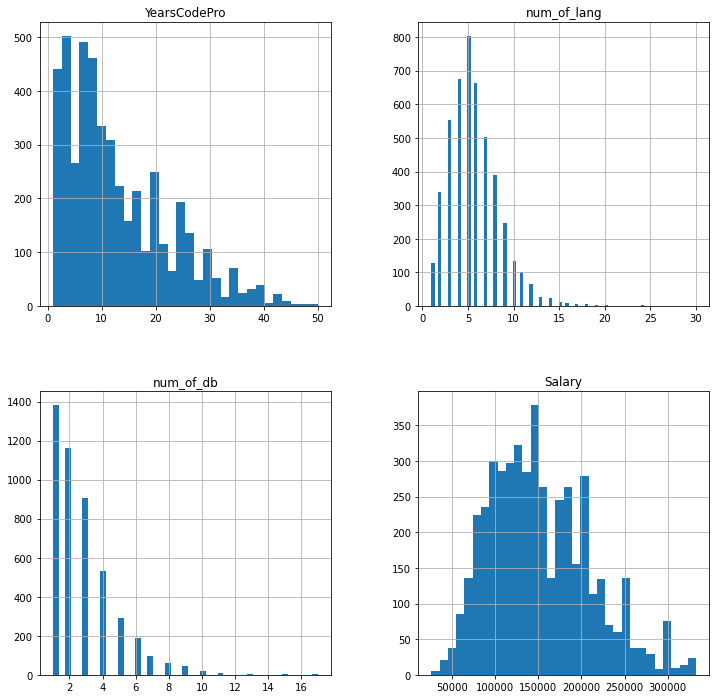

In [4]:
#continuous variables
con = ['YearsCodePro', 'num_of_lang', 'num_of_db','Salary']
ovsv_cont = ovsv[con]
ovsv_cont.hist(figsize=[12,12], bins='auto')
plt.show()

Data Visual 2

Distibution of salary

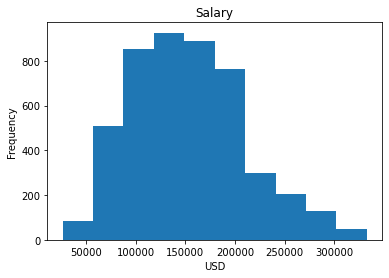

In [5]:
#Salary Hist
ovsv['Salary'].plot(kind='hist')
plt.title('Salary')
plt.xlabel('USD')
plt.show()

Data Visual 3

Overview of Education vs Salary

In [6]:
#Mean of Salary based on Education
round(ovsv.groupby('EdLevel')['Salary'].mean())

EdLevel
Associate degree (A.A., A.S., etc.)                                                   129133.0
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          150698.0
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       163100.0
Primary/elementary school                                                             143147.0
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                        158698.0
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    141546.0
Some college/university study without earning a degree                                147627.0
Something else                                                                        118057.0
Name: Salary, dtype: float64

In [7]:
print('Min Salary:',ovsv['Salary'].min())
print('Median Salary:',ovsv['Salary'].median())
print('Mean Salary:', round(ovsv['Salary'].mean()))
print('Max Salary:',ovsv['Salary'].max())

Min Salary: 26000.0
Median Salary: 147514.5
Mean Salary: 151890
Max Salary: 333000.0


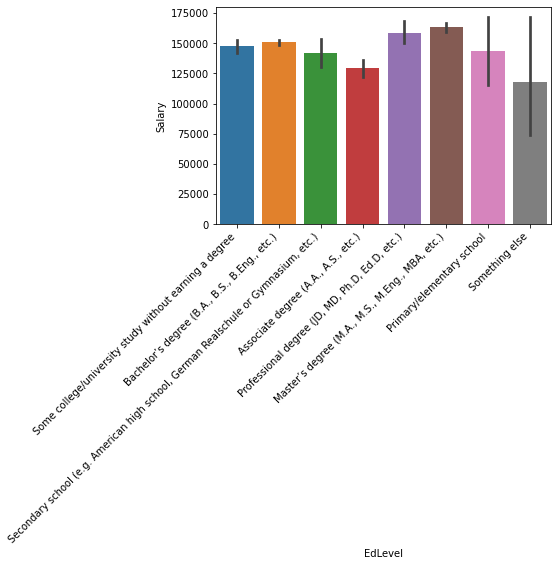

In [8]:
#Data Vis of Education Level Vs Salary
sns.barplot(x='EdLevel', y='Salary', data = ovsv)
plt.xticks(rotation=45, ha='right')

plt.show()

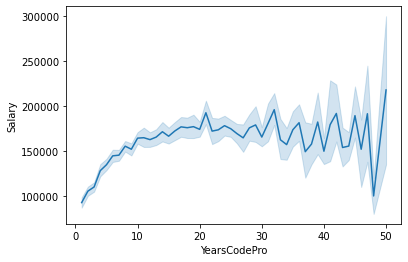

In [14]:
sns.lineplot(x='YearsCodePro', y='Salary', data=ovsv)

plt.show()

Linear Regression Model

Relationship between salary and number of coding languages used

In [9]:
#Making the formula
form = 'Salary~YearsCodePro'

model = ols(formula=form, data=ovsv).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     514.4
Date:                Sun, 06 Apr 2025   Prob (F-statistic):          3.76e-108
Time:                        20:52:00   Log-Likelihood:                -58016.
No. Observations:                4704   AIC:                         1.160e+05
Df Residuals:                    4702   BIC:                         1.160e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.277e+05   1332.973     95.827      0.000    1.25e+05     1.3e+05
YearsCodePro  1870.2382     82.464     22.679      0.000    1708.569    2031.907
==============================================================================
Omnibus:                      325.759   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              395.555
Skew:                           0.686   Prob(JB):                     1.28e-86
Kurtosis:                       3.371   Cond. No.                         26.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
#creating simple linear regression
X = ovsv[['YearsCodePro']]
y = ovsv[['Salary']]

In [11]:
#training model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lreg = LinearRegression()
lreg.fit(X_train, y_train)

y_ovsv_train = lreg.predict(X_train)
y_ovsv_test = lreg.predict(X_test)

In [12]:
#model is good test results are similar
mse_train = np.sum((y_train-y_ovsv_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_ovsv_test)**2)/len(y_test)
print('Train Mean Squared Error:',mse_train)
print('Test Mean Squared Error:',mse_test)

Train Mean Squared Error: Salary    3.012229e+09
dtype: float64
Test Mean Squared Error: Salary    3.054458e+09
dtype: float64


Evaluation:

As shown by dat visual 3 
Will my education level significantly impact my salary as a developer?

Yes, based on the data, education level does have an impact on salary. For example, developers with a master's degree earn an average of $163,100, whereas those with just an associate degree make around $129,133. The difference in salary can be substantial as you advance your education.

Do I really need a master's degree to earn a high salary?

Not necessarily. While a master's degree can increase your earning potential (with an average salary of $163,100), a bachelor’s degree still provides a solid earning potential at $150,698. In fact, many developers without a master's degree or higher still achieve great success.

Can I still earn well without a degree?

Absolutely! Developers with some college/university study without completing a degree earn an average salary of $147,627. Furthermore, those in non-traditional education paths, such as coding bootcamps, can earn an average of $118,057. This shows that hands-on experience and skills can be just as important as formal education.

What’s the highest salary I could earn as a developer?

The maximum salary for developers can be as high as $333,000, according to the data. While this is on the extreme end, it’s possible to reach this level with significant experience, specialized skills, or a combination of advanced education and industry leadership.

Is there a big difference between earning a high school diploma or an associate degree?

The data shows a modest difference. Developers with just a high school diploma earn an average of $141,546, while those with an associate degree earn $129,133 on average. While the difference is noticeable, it highlights that early career experience can play a significant role in salary as well.